In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def get_data(hashtag):
    dictionary = {'#GoHawks': 'tweets_#gohawks.txt',
                     '#GoPatriots': 'tweets_#gopatriots.txt',
                  '#Patriots': 'tweets_#patriots.txt',
                     '#NFL': 'tweets_#nfl.txt',
                     '#SB49': 'tweets_#sb49.txt',
                     '#SuperBowl': 'tweets_#superbowl.txt'}
    time_stamp = []
    number_of_followers = []
    number_of_retweets = []
    file = open('./tweet_data/'+dictionary[hashtag])
    # need to handle duplicates in users tweeting for actual number of users and for the number of followers
    authors = set()
    for line in file:
        data = json.loads(line)
        time_stamp.append(data['citation_date'])
        number_of_retweets.append(data['metrics']['citations']['total'])
        if data['tweet']['user']['id'] not in authors:
            authors.add(data['tweet']['user']['id'])
            number_of_followers.append(data['author']['followers'])
    file.close()
    number_of_users = len(authors)
    return time_stamp, number_of_followers, number_of_retweets, number_of_users

In [5]:
def calculations(hashtag):
    time_stamp, number_of_followers, number_of_retweets, number_of_users = get_data(hashtag)
    total_number_of_tweets = len(time_stamp)
    hours = float(max(time_stamp)-min(time_stamp))/3600.0
    total_number_of_retweets = sum(number_of_retweets)
    total_number_of_followers = sum(number_of_followers)
    print('The hashtag being processed is:', hashtag)
    print('Average number of tweets per hour:', (total_number_of_tweets/hours))
    print('Average number of followers of users posting the tweets:', (total_number_of_followers/number_of_users))
    print('Average number of retweets:', total_number_of_retweets/total_number_of_tweets, '\n')
    return time_stamp

In [6]:
def plot(time_stamp, hashtag):
    hourly_tweets = [0] * int((max(time_stamp)-min(time_stamp))/3600+1)
    start = min(time_stamp)
    for time in time_stamp:
        hourly_tweets[int((time-start)/3600)] += 1
    plt.bar([i for i in range(0,len(hourly_tweets))], hourly_tweets)
    plt.xlabel('Hours')
    plt.ylabel('Number of Tweets')
    plt.title('Hours VS Number of Tweets for '+ str(hashtag))
    plt.show()

The hashtag being processed is: #NFL
Average number of tweets per hour: 441.3234311373958
Average number of followers of users posting the tweets: 4289.746617531629
Average number of retweets: 1.5385331089011056 



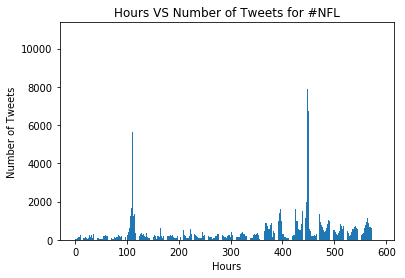

The hashtag being processed is: #SuperBowl
Average number of tweets per hour: 2302.5004018833274
Average number of followers of users posting the tweets: 3591.604474474039
Average number of retweets: 2.3882723999030224 



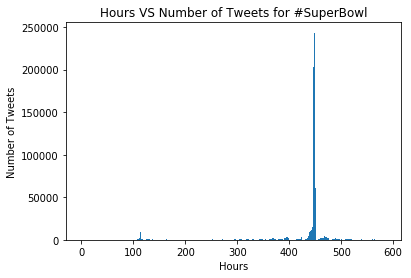

The hashtag being processed is: #Patriots
Average number of tweets per hour: 834.5555091641886
Average number of followers of users posting the tweets: 1650.321982506216
Average number of retweets: 1.7828156491659402 

The hashtag being processed is: #GoHawks
Average number of tweets per hour: 325.37159130433116
Average number of followers of users posting the tweets: 1544.9697802197802
Average number of retweets: 2.014617085512608 

The hashtag being processed is: #GoPatriots
Average number of tweets per hour: 45.69451057356203
Average number of followers of users posting the tweets: 1298.8242710358234
Average number of retweets: 1.4000838670326319 

The hashtag being processed is: #SB49
Average number of tweets per hour: 1419.8879074871902
Average number of followers of users posting the tweets: 2235.1636799951193
Average number of retweets: 2.5111487863247035 



In [7]:
hashtags = ['#NFL', '#SuperBowl', '#Patriots', '#GoHawks', '#GoPatriots', '#SB49']
for i in hashtags:
    time_stamp = calculations(i)
    if i in ['#NFL', '#SuperBowl']:
        plot(time_stamp, i)